In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer



ModuleNotFoundError: No module named 'lightgbm'

In [2]:
!pip install pygam
from pygam import LogisticGAM, s, f

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.6 MB/s eta 0:00:0000:01


# Final checks on data

In [71]:
df = pd.read_csv('/kaggle/input/dataset/dataset.csv', sep = ';')

In [52]:
df.shape

(4424, 37)

In [53]:
df_wo_na = df.dropna()
df_wo_na.shape

(4424, 37)

There are indeed no NA values as specified in the archive.

### Binning the data

To reduce the dimensions of the dataset, I created further binning on categorical variables with a lot of levels. Look at the code levels in archive to see what I binned into what categories.


In [72]:
marital_status_bins = {
    1: 'single',
    2: 'married',
    3: 'other', 4: 'other', 5: 'other', 6: 'other'
}

application_mode_bins = {
    1: 'general contingent', 17: 'general contingent', 18: 'general contingent',
    5: 'special contingent', 16: 'special contingent',
    2: 'Ordinance', 10: 'Ordinance', 26: 'Ordinance', 27: 'Ordinance',
    7: 'Other', 15: 'Other', 39: 'Other', 42: 'Other', 43: 'Other', 44: 'Other', 51: 'Other', 53: 'Other', 57: 'Other'
}

course_bins = {
    8014: 'social sciences', 9070: 'social sciences', 9147: 'social sciences', 9238: 'social sciences', 9670: 'social sciences', 
    9773: 'social sciences', 9853: 'social sciences', 9991: 'social sciences',
    9500: 'health sciences', 9556: 'health sciences',
    33: 'technology', 9003: 'technology', 9119: 'technology',
    171: 'other', 9085: 'other', 9254: 'other', 9130: 'other'
}

previous_qualification_bins = {
    1: 'secondary education', 9: 'secondary education', 10: 'secondary education', 12: 'secondary education', 14: 'secondary education', 15: 'secondary education',
    2: 'higher education', 3: 'higher education', 4: 'higher education', 5: 'higher education', 6: 'higher education', 40: 'higher education', 43: 'higher education',
    19: 'basic education', 38: 'basic education',
    39: 'professional qualification', 42: 'professional qualification'
}

nationality_bins = {
    1: 'eea', 2: 'eea', 6: 'eea', 11: 'eea', 13: 'eea', 14: 'eea', 17: 'eea', 62: 'eea', 100: 'eea', 103: 'eea',
    21: 'other', 22: 'other', 24: 'other', 25: 'other', 26: 'other', 32: 'other', 41: 'other', 101: 'other', 105: 'other', 108: 'other', 109: 'other'
}

qualification_bins = {
    1: 'secondary or some secondary', 9: 'secondary or some secondary', 10: 'secondary or some secondary', 11: 'secondary or some secondary', 12: 'secondary or some secondary', 14: 'secondary or some secondary',
    19: 'basic', 26: 'basic', 27: 'basic', 29: 'basic', 30: 'basic', 37: 'basic', 38: 'basic',
    2: 'higher education', 3: 'higher education', 4: 'higher education', 5: 'higher education', 6: 'higher education', 40: 'higher education', 43: 'higher education', 44: 'higher education',
    18: 'professional qualification', 22: 'professional qualification', 39: 'professional qualification', 41: 'professional qualification', 42: 'professional qualification',
    34: 'little to no education', 35: 'little to no education', 36: 'little to no education'
}

qualification_bins_father = {
    1: 'secondary or some secondary', 9: 'secondary or some secondary', 10: 'secondary or some secondary', 11: 'secondary or some secondary', 12: 'secondary or some secondary', 14: 'secondary or some secondary',
    19: 'basic', 26: 'basic', 27: 'basic', 29: 'basic', 30: 'basic', 37: 'basic', 38: 'basic',
    2: 'higher education', 3: 'higher education', 4: 'higher education', 5: 'higher education', 6: 'higher education', 40: 'higher education', 43: 'higher education', 44: 'higher education',
    18: 'professional qualification', 22: 'professional qualification', 39: 'professional qualification', 41: 'professional qualification', 42: 'professional qualification',
    34: 'little to no education', 35: 'little to no education', 36: 'little to no education', 13: 'secondary or some secondary', 20: 'secondary or some secondary',
    25: 'secondary or some secondary', 31: 'professional qualification', 33: 'professional qualification'
}

occupation_bins = {
    0: 'students',
    1: 'leadership and management',
    2: 'professionals and specialists', 122: 'professionals and specialists', 123: 'professionals and specialists', 125: 'professionals and specialists',
    3: 'Intermediate Level Technicians and Professions', 131: 'Intermediate Level Technicians and Professions', 132: 'Intermediate Level Technicians and Professions', 134: 'Intermediate Level Technicians and Professions',
    4: 'Administrative and Office Workers', 141: 'Administrative and Office Workers', 143: 'Administrative and Office Workers', 144: 'Administrative and Office Workers',
    5: 'Service and Sales Workers', 151: 'Service and Sales Workers', 152: 'Service and Sales Workers', 153: 'Service and Sales Workers',
    6: 'Agricultural and Skilled Workers', 171: 'Agricultural and Skilled Workers', 173: 'Agricultural and Skilled Workers', 175: 'Agricultural and Skilled Workers',
    7: 'Industrial and Machine Operators', 8: 'Industrial and Machine Operators',
    9: 'Unskilled Workers', 192: 'Unskilled Workers', 193: 'Unskilled Workers', 191: 'Unskilled Workers', 194: 'Unskilled Workers',
    10: 'Military and Armed Forces',
    90: 'Other Situations and Blanks', 99: 'Other Situations and Blanks'
}

occupation_bins_father = {
    0: 'students',
    1: 'leadership and management',
    2: 'professionals and specialists', 122: 'professionals and specialists', 123: 'professionals and specialists', 125: 'professionals and specialists',
    3: 'Intermediate Level Technicians and Professions', 131: 'Intermediate Level Technicians and Professions', 132: 'Intermediate Level Technicians and Professions', 134: 'Intermediate Level Technicians and Professions',
    4: 'Administrative and Office Workers', 141: 'Administrative and Office Workers', 143: 'Administrative and Office Workers', 144: 'Administrative and Office Workers',
    5: 'Service and Sales Workers', 151: 'Service and Sales Workers', 152: 'Service and Sales Workers', 153: 'Service and Sales Workers',
    6: 'Agricultural and Skilled Workers', 171: 'Agricultural and Skilled Workers', 173: 'Agricultural and Skilled Workers', 175: 'Agricultural and Skilled Workers',
    7: 'Industrial and Machine Operators', 8: 'Industrial and Machine Operators',
    9: 'Unskilled Workers', 192: 'Unskilled Workers', 193: 'Unskilled Workers', 191: 'Unskilled Workers', 194: 'Unskilled Workers',
    10: 'Military and Armed Forces',
    90: 'Other Situations and Blanks', 99: 'Other Situations and Blanks', 101: 'Military and Armed Forces', 102: 'Military and Armed Forces', 103: 'Military and Armed Forces',
    112: 'leadership and management', 114: 'leadership and management', 121: 'professionals and specialists',
    124: 'professionals and specialists', 135: 'Intermediate Level Technicians and Professions', 154: 'Service and Sales Workers',
    161: 'Agricultural and Skilled Workers', 163: 'Agricultural and Skilled Workers', 
    172: 'Agricultural and Skilled Workers', 174: 'Agricultural and Skilled Workers',
    181: 'Industrial and Machine Operators', 182: 'Industrial and Machine Operators', 183: 'Industrial and Machine Operators',
    195: 'Service and Sales Workers'
}

# Apply binning
df['Marital status'] = df['Marital status'].map(marital_status_bins)
df['Application mode'] = df['Application mode'].map(application_mode_bins)
df['Course'] = df['Course'].map(course_bins)
df['Previous qualification'] = df['Previous qualification'].map(previous_qualification_bins)
df['Nacionality'] = df['Nacionality'].map(nationality_bins)
df["Mother's qualification"] = df["Mother's qualification"].map(qualification_bins)
df["Father's qualification"] = df["Father's qualification"].map(qualification_bins_father)
df["Mother's occupation"] = df["Mother's occupation"].map(occupation_bins)
df["Father's occupation"] = df["Father's occupation"].map(occupation_bins_father)

In [28]:
df.shape

(4424, 37)

### Examine and visualise distributions of continuous variables
Spot any odd values, outliers

In [ ]:
df.describe()

In [60]:
continuous_cols = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]
categorical_cols = [col for col in df.columns if col not in continuous_cols]

In [ ]:
sns.pairplot(df[continuous_cols])
plt.show()

Some variables show notable skew.

In [30]:
#Skewed variables
skewed = ['Age at enrollment', 'Curricular units 1st sem (credited)','Curricular units 1st sem (grade)',
         'Curricular units 2nd sem (credited)',
         'Curricular units 1st sem (without evaluations)',
         'Curricular units 2nd sem (grade)',
         'Curricular units 2nd sem (without evaluations)']

df[skewed].describe()

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,0.709991,10.640822,0.541817,0.137658,10.230206,0.150316
std,7.587816,2.360507,4.843663,1.918546,0.690880,5.210808,0.753774
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,11.000000,0.000000,0.000000,10.750000,0.000000
50%,20.000000,0.000000,12.285714,0.000000,0.000000,12.200000,0.000000
75%,25.000000,0.000000,13.400000,0.000000,0.000000,13.333333,0.000000
max,70.000000,20.000000,18.875000,19.000000,12.000000,18.571429,12.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

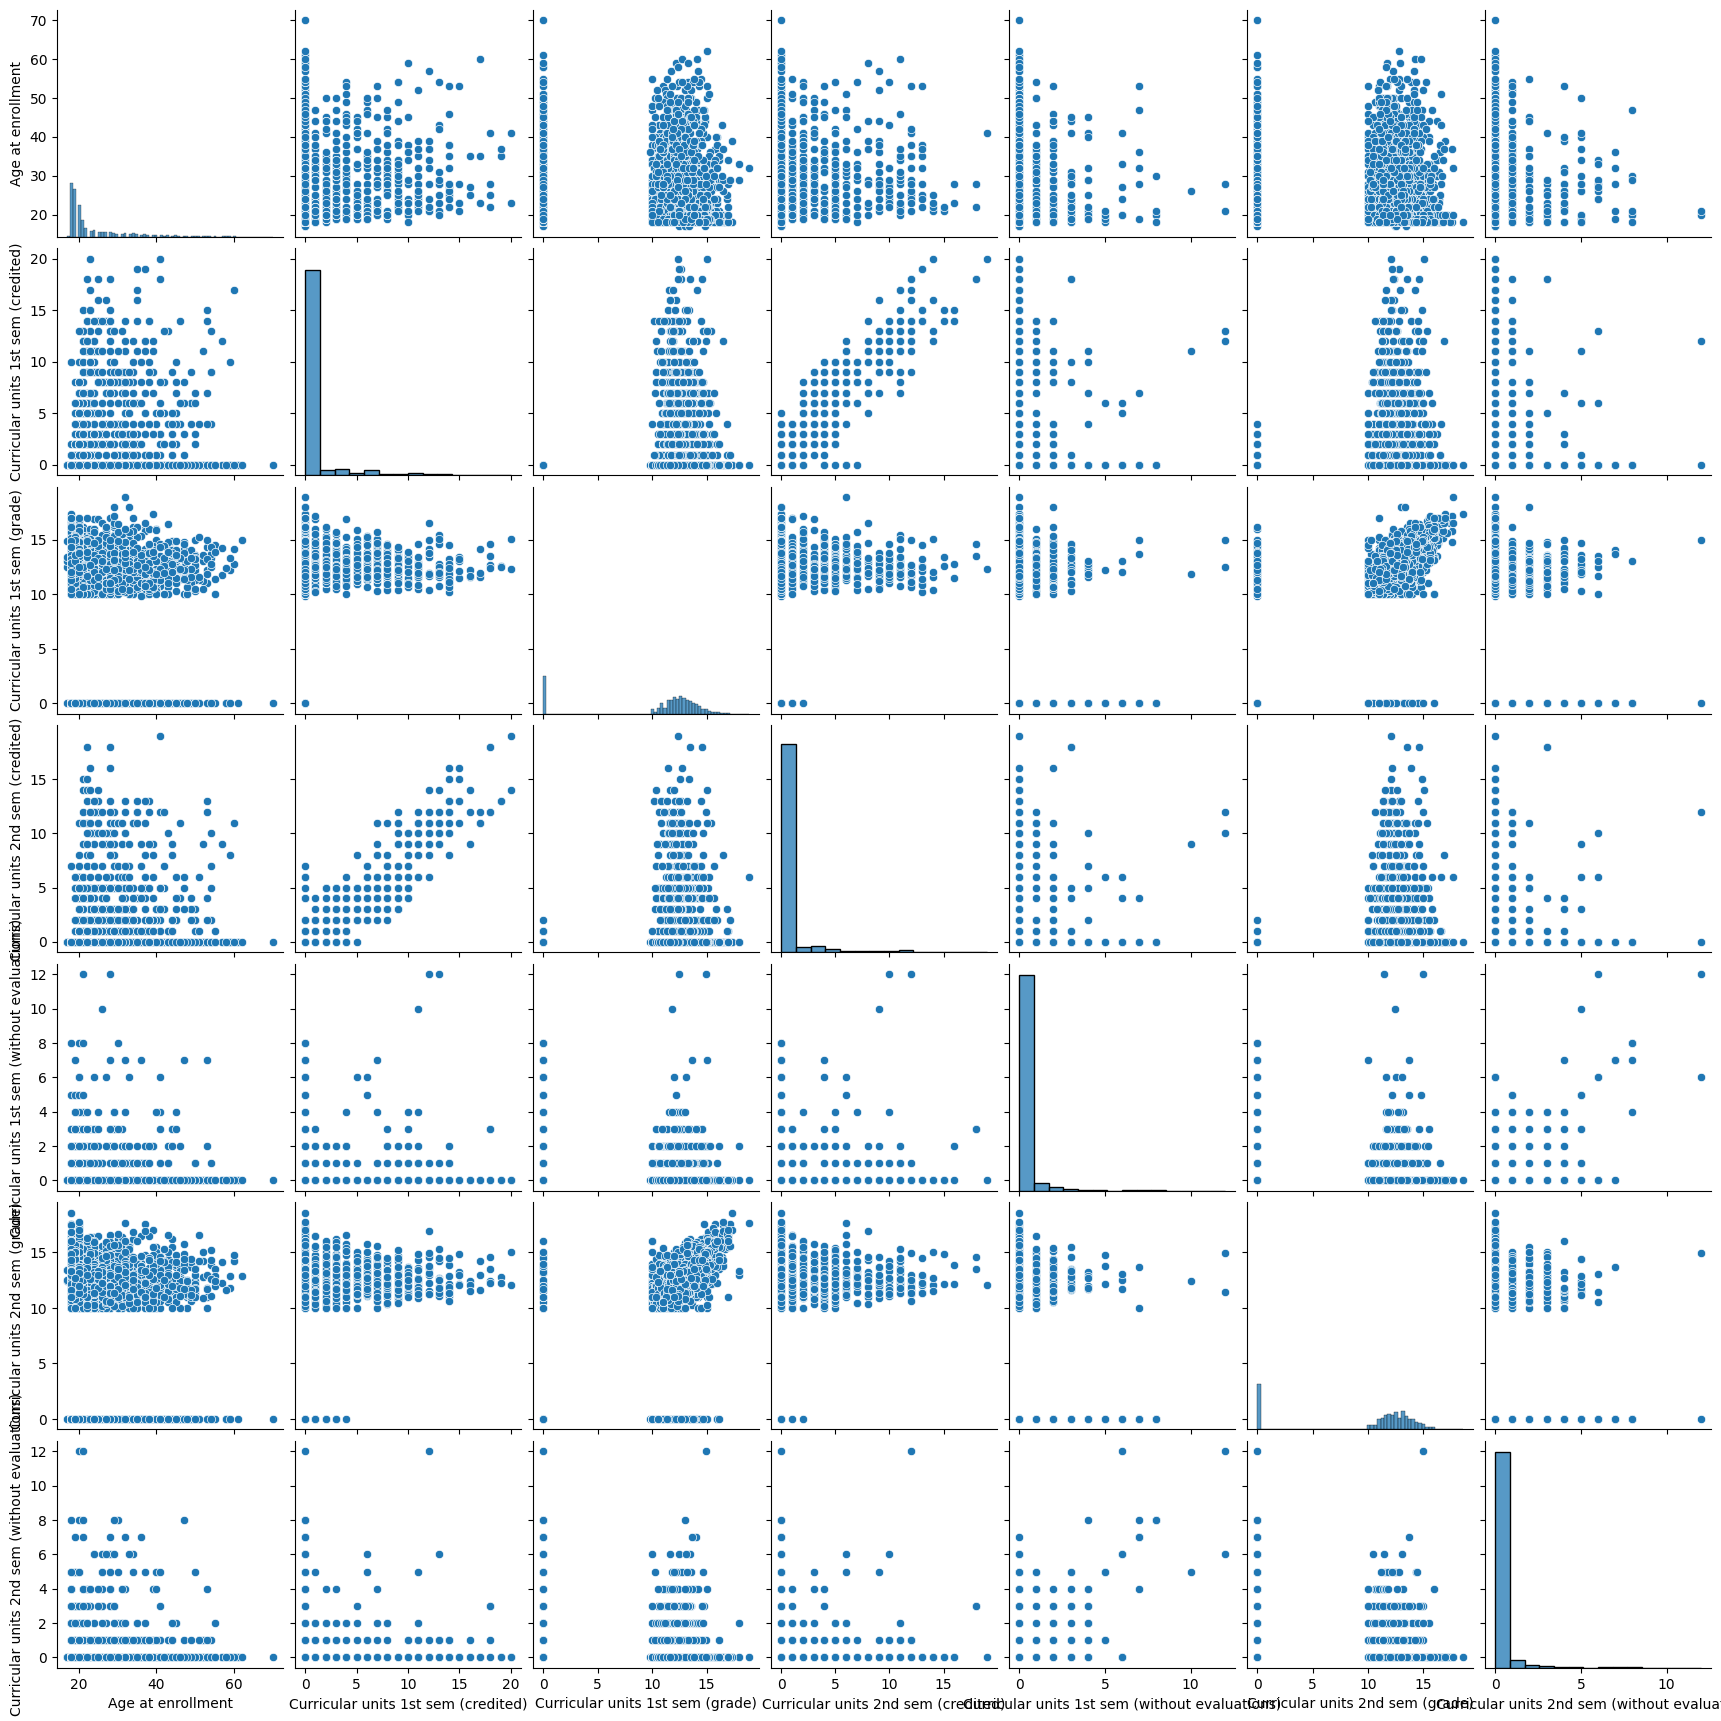

In [31]:
sns.pairplot(df[skewed])
plt.show()

Some of these skewed variables are also highly correlated with each other.

In [ ]:
plt.figure(figsize=(14, 10))
correlation_matrix = df[continuous_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Removing some of these variables and applying a log-transform improves data for linear fit.

In [61]:
redundant_variables = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
                    'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (credited)',
                    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                    'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Admission grade',
                      'Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (enrolled)']
continuous_cols_wo_neg = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate'
]
new_continuous_cols = list(set(continuous_cols_wo_neg) - set(redundant_variables))

In [47]:
for col in new_continuous_cols:
    df[col] = np.log(abs(df[col]) + 0.1)

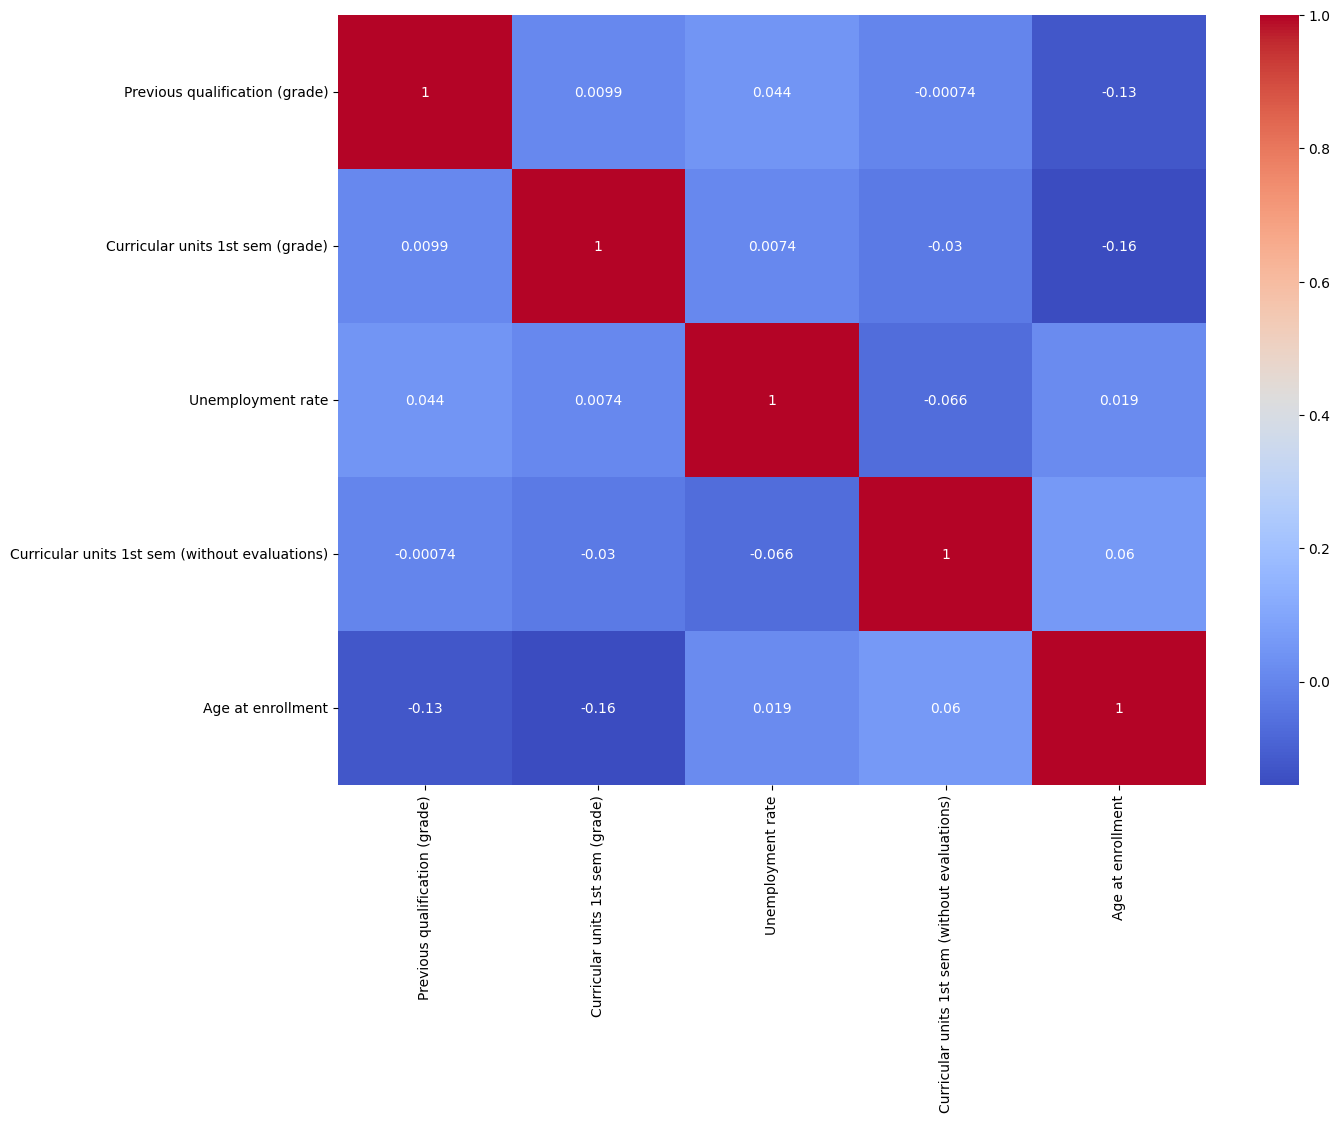

In [48]:
plt.figure(figsize=(14, 10))
correlation_matrix = df[new_continuous_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

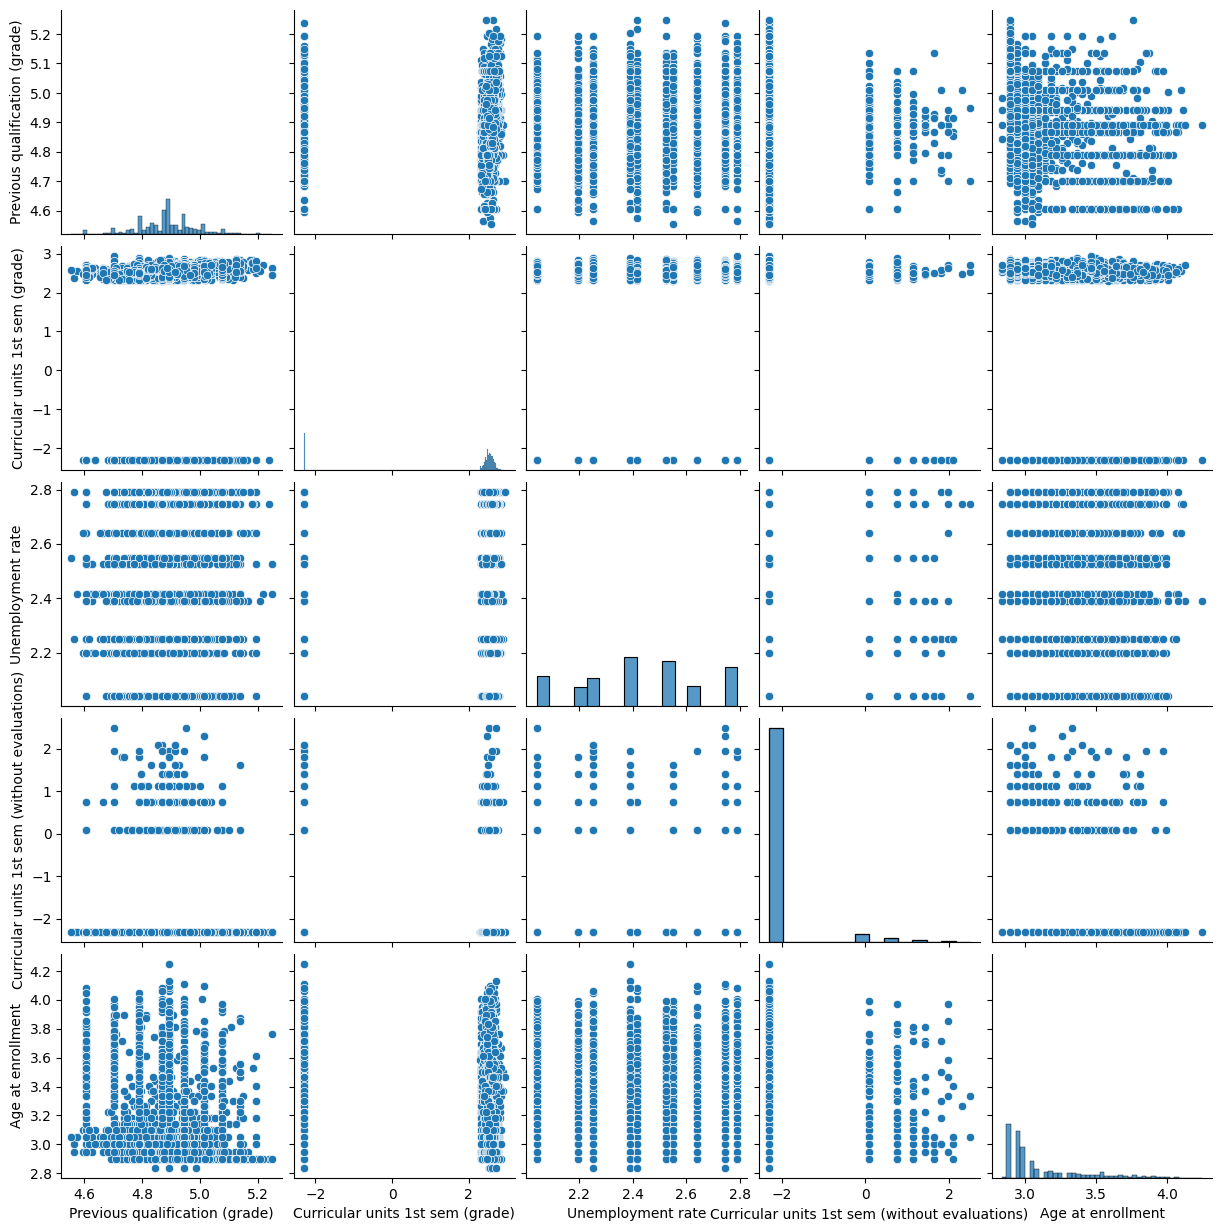

In [49]:
sns.pairplot(df[new_continuous_cols])
plt.show()

### Categorical variables

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

### Conclusion
No obvious anomalies and data is ready to be fed into non-parametric models. Linear models need some transformation.

# GAM with smoothing splines

To meet model assumptions, highly-correlated variables will be removed and a log-transform will be applied to the positively valued numerical variables as there was evidence of skew.

In [73]:
def linear_mod_transform(data):
    redundant_variables = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
                           'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (credited)',
                           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
                           'Admission grade', 'Curricular units 2nd sem (without evaluations)',
                          'Curricular units 1st sem (enrolled)']

    continuous_cols_wo_neg_values = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
                                     'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
                                     'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                                     'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                                     'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                                     'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                                     'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                                     'Unemployment rate']

    new_continuous_cols = list(set(continuous_cols_wo_neg_values) - set(redundant_variables))

    for col in new_continuous_cols:
        data[col] = np.log(abs(data[col]) + 0.1)

    df_gam = data.drop(columns=redundant_variables)

    return df_gam

### Frame the problem as dropout-no dropout

In [74]:
df['Target'] = df['Target'].replace({'Dropout': 1, 'Graduate': 0, "Enrolled" : 0})

/tmp/ipykernel_33/700855488.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Target'].replace({'Dropout': 1, 'Graduate': 0, "Enrolled" : 0})


In [ ]:
df_to_save = linear_mod_transform(data = df)
df_to_save.to_csv("linmod_dataset.csv", index=False)

In [ ]:
numerical_cols = ['Application order',
 'Previous qualification (grade)',
 'Age at enrollment',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

categorical_cols_dummy = list(set(list(X_train.columns)) - set(numerical_cols))

num_column_indices = [X_train.columns.get_loc(col) for col in numerical_cols]
cat_column_indices = [X_train.columns.get_loc(col) for col in categorical_cols_dummy]

### Class weights

In [ ]:
df_gam = linear_mod_transform(data = df)

X = df_gam.drop(columns=["Target"])
y = df_gam["Target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), X_train.select_dtypes(include=np.number).columns),
        ("cat", OneHotEncoder(), X_train.select_dtypes(include=["object", "category"]).columns)
    ]
)

logistic_gam = LogisticGAM(s(0) + s(2) + s(9) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) +
                            f(36) + f(51) + f(1) + f(6) + f(28) + f(52) + f(46) + f(58) + f(30) +
                            f(31) + f(21) + f(22) + f(47) + f(48) + f(34) + f(38) + f(10) +
                            f(64) + f(45) + f(7) + f(59) + f(35) + f(20) + f(27) + f(49) + f(56) +
                            f(18) + f(33) + f(3) + f(25) + f(8) + f(23) + f(4) + f(37) + f(32) +
                            f(53) + f(61) + f(65) + f(44) + f(50) + f(26) + f(60) + f(55) +
                            f(24) + f(29) + f(62) + f(42) + f(40) + f(17) + f(43) + f(5) +
                            f(54) + f(39) + f(41) + f(19) + f(57) + f(63))

# Define the pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("logistic_gam", logistic_gam)
])

# Compute sample weights
weights = compute_sample_weight(class_weight="balanced", y=y_train)

# Fit the model
pipeline.fit(X_train, y_train, logistic_gam__weights=weights)

# Get summary
pipeline.named_steps["logistic_gam"].summary()

In [ ]:
pred = pipeline.predict(X_test)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))


In [ ]:
coefficients = pipeline.named_steps["logistic_gam"].coef_

In [ ]:
stats = pipeline.named_steps["logistic_gam"].statistics_

### SMOTE

In [ ]:
df_gam = linear_mod_transform(data = df)

X = df_gam.drop(columns=["Target"])
y = df_gam["Target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), X_train.select_dtypes(include=np.number).columns),
        ("cat", OneHotEncoder(), X_train.select_dtypes(include=["object", "category"]).columns)
    ]
)

logistic_gam = LogisticGAM(s(0) + s(2) + s(9) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) +
                            f(36) + f(51) + f(1) + f(6) + f(28) + f(52) + f(46) + f(58) + f(30) +
                            f(31) + f(21) + f(22) + f(47) + f(48) + f(34) + f(38) + f(10) +
                            f(64) + f(45) + f(7) + f(59) + f(35) + f(20) + f(27) + f(49) + f(56) +
                            f(18) + f(33) + f(3) + f(25) + f(8) + f(23) + f(4) + f(37) + f(32) +
                            f(53) + f(61) + f(65) + f(44) + f(50) + f(26) + f(60) + f(55) +
                            f(24) + f(29) + f(62) + f(42) + f(40) + f(17) + f(43) + f(5) +
                            f(54) + f(39) + f(41) + f(19) + f(57) + f(63))

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=123)),
    ("logistic_gam", logistic_gam)
])

param_grid = {
    'smote__sampling_strategy': ['auto', 0.4],
    'smote__k_neighbors': [3, 5, 7]
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_.named_steps["logistic_gam"]
print(best_model.summary())

In [ ]:
pred = best_model.predict(X_test)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))

## Logistic regression

### Class weights

In [75]:
df_gam = linear_mod_transform(data = df)

In [76]:
X = df_gam.drop(columns=["Target"])
y = df_gam["Target"]

numerical_cols = ['Application order',
 'Previous qualification (grade)',
 'Age at enrollment',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

categorical_cols_dummy = list(set(list(X.columns)) - set(numerical_cols))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

num_column = [col for col in numerical_cols]
cat_column = [col for col in categorical_cols_dummy]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_column)
    ],
    remainder="passthrough"  # This will pass through any remaining columns without transformation
)



In [77]:
logistic = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# Define the pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("StdScaler" , StandardScaler()),
    ("logistic", logistic)
])

# Define hyperparameters grid
param_grid = {
    'logistic__penalty': ['l1', 'l2'],
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strengths (inverse of lambda values)
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5,  n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

In [80]:
grid_search.best_params_

{'logistic__C': 0.1, 'logistic__penalty': 'l1'}

In [78]:
pred = best_model.predict(X_test)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       601
           1       0.68      0.70      0.69       284

    accuracy                           0.80       885
   macro avg       0.77      0.77      0.77       885
weighted avg       0.80      0.80      0.80       885

0.7695566075320475


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


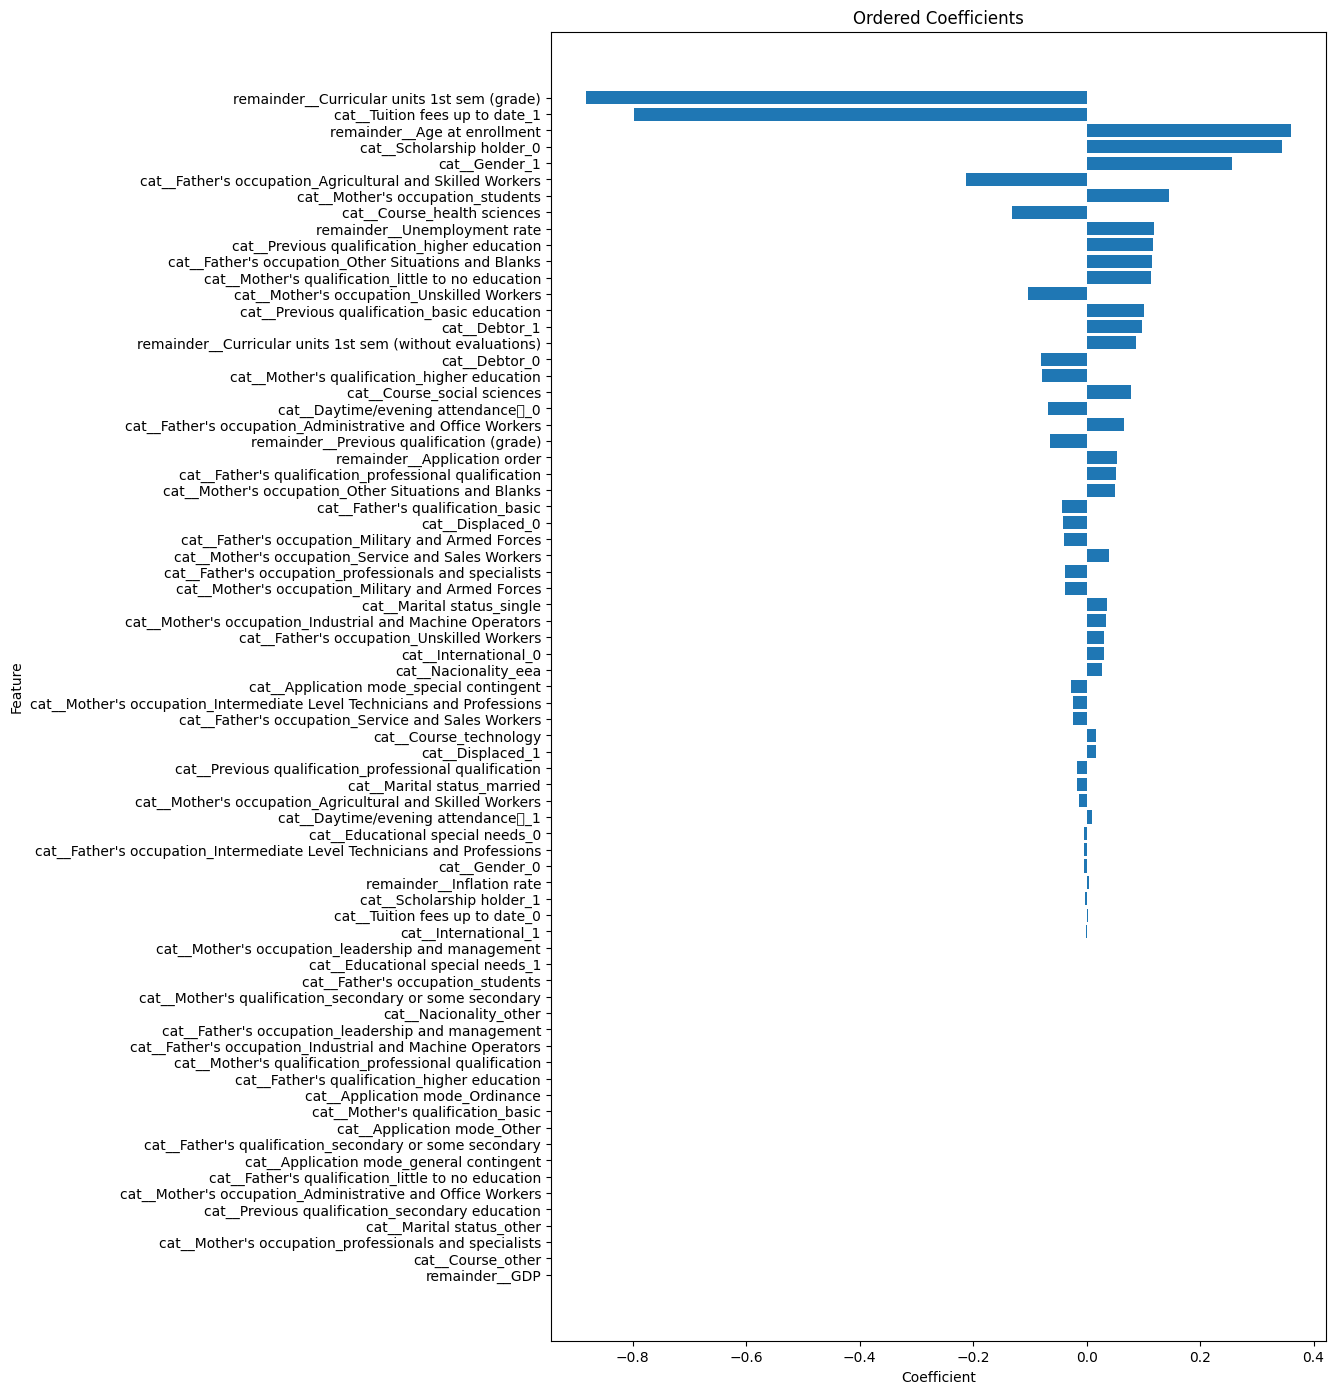

In [79]:
# Get coefficients
coefficients = best_model.named_steps['logistic'].coef_[0]

# Get feature names from preprocessor
preprocessor_1 = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_column)
    ],
    remainder="passthrough"  # This will pass through any remaining columns without transformation
)
preprocessor_1.fit_transform(df_gam.drop(columns = ["Target"]))
feature_names = preprocessor_1.get_feature_names_out()
#feature_names = list(set(list(best_model.named_steps['preprocessor'].transformers_[0][2]) + list(best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out())) )#+ ["infrequent"] 

# Create DataFrame for coefficients and feature names
coefficients_df = pd.DataFrame({'Feature':  feature_names , 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot coefficients
plt.figure(figsize=(10, 17))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Ordered Coefficients')
plt.gca().invert_yaxis()
plt.show()

### SMOTE

In [82]:
from imblearn.pipeline import Pipeline as ImbPipeline
# Define the logistic regression model
logistic = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# Define the pipeline
pipeline = ImbPipeline([
    ("preprocessor", preprocessor),
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("StdScaler" , StandardScaler()),
    ("smote", SMOTE(random_state=123)),
    ("logistic", logistic)
])

# Define hyperparameters grid
param_grid = {
    'logistic__penalty': ['l1', 'l2'],
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strengths (inverse of lambda values)
    'smote__sampling_strategy': ['auto', 0.6],  # Ratio of majority to minority class
    'smote__k_neighbors': [3, 5, 7]  # Number of nearest neighbors
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, verbose = 1, n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         ['Course',
                                                                          "Father's "
                                                                          'occupation',
                                                                          'Gender',
                                                                          'Debtor',
                                                                          'Application '
                                                                          'mode',
                                                                          'Marital '
                                                                          'status',
                                                                          'Educational '
                                                                          'special '
                                                                          'needs',
                                                                          'Scholarship '
                                                                          'holder',
                                                                          'Nacionality',
                                                                          "Mother's "
                                                                          'occupatio...
                                        SimpleImputer(strategy='most_frequent')),
                                       ('StdScaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=123)),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logistic__penalty': ['l1', 'l2'],
                         'smote__k_neighbors': [3, 5, 7],
                         'smote__sampling_strategy': ['auto', 0.6]},
             scoring='roc_auc', verbose=1)

In [83]:
grid_search.best_params_

{'logistic__C': 0.01,
 'logistic__penalty': 'l1',
 'smote__k_neighbors': 7,
 'smote__sampling_strategy': 'auto'}

In [84]:
best_model = grid_search.best_estimator_
pred = best_model.predict(X_test)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       601
           1       0.70      0.67      0.69       284

    accuracy                           0.80       885
   macro avg       0.77      0.77      0.77       885
weighted avg       0.80      0.80      0.80       885

0.7680479716903752


## GBM
Will use the full dataframe untransformed, only binning applied.

### Class weights

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ["Target", 'Curricular units 2nd sem (approved)']), df["Target"],test_size=.20, stratify =df["Target"],  random_state =123)
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

param_grid = {
    'n_estimators': [100, 200, 300],              # Number of boosting rounds
    'max_depth': [1,2,4,6],                     # Maximum tree depth for base learners
    'learning_rate': [0.01, 0.05],                    # Maximum tree leaves for base learners
    'subsample': [0.6, 0.8],                    # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8],             # Subsample ratio of columns when constructing each tree
    'class_weight' : [None, "balanced"]
}

pipeline = Pipeline([("onehotencoder", OneHotEncoder(handle_unknown = "infrequent_if_exist")),
    ("grid_search", GridSearchCV(
    LGBMClassifier( verbose = -1
    ),
    param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, refit=True
))   
])

pipeline.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='infrequent_if_exist')),
                ('grid_search',
                 GridSearchCV(cv=5, estimator=LGBMClassifier(verbose=-1),
                              n_jobs=-1,
                              param_grid={'class_weight': [None, 'balanced'],
                                          'colsample_bytree': [0.6, 0.8],
                                          'learning_rate': [0.01, 0.05],
                                          'max_depth': [1, 2, 4, 6],
                                          'n_estimators': [100, 200, 300],
                                          'subsample': [0.6, 0.8]},
                              scoring='roc_auc', verbose=1))])

In [93]:
grid_search = pipeline.named_steps["grid_search"]
grid_search.best_params_

{'class_weight': 'balanced',
 'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 0.6}

In [91]:
pred = pipeline.predict(X_test)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       601
           1       0.77      0.78      0.77       284

    accuracy                           0.85       885
   macro avg       0.83      0.84      0.83       885
weighted avg       0.85      0.85      0.85       885

0.8351046378102224


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


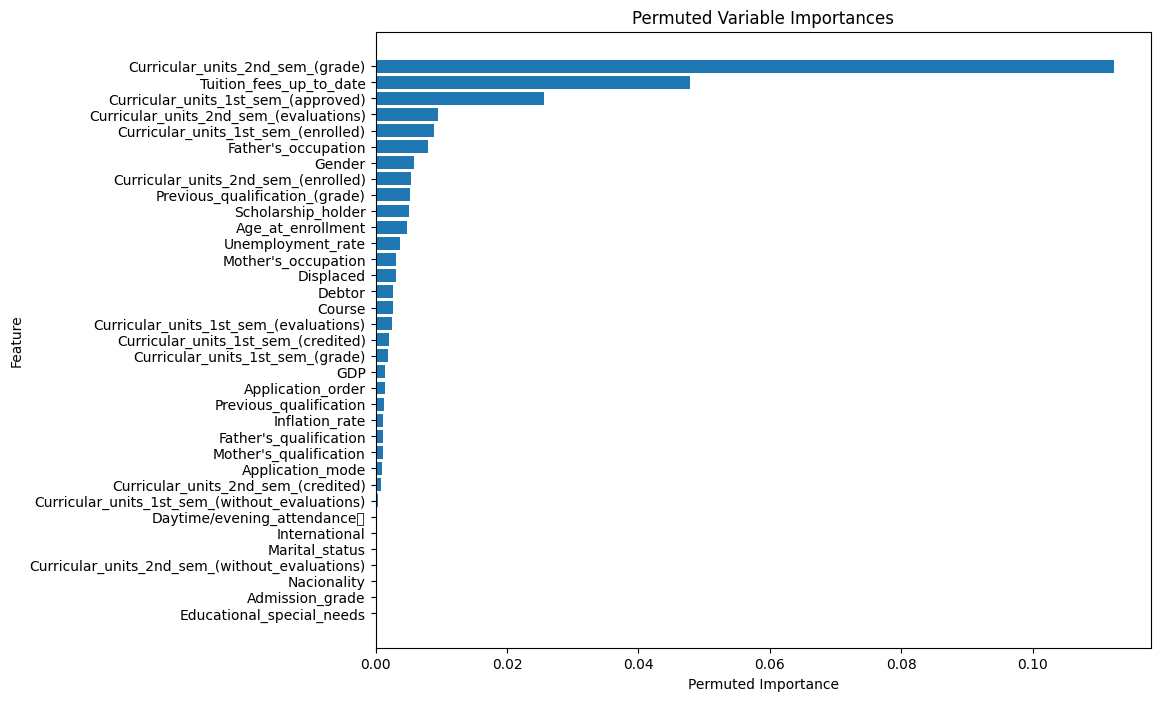

In [95]:
from sklearn.inspection import permutation_importance
# Compute permuted variable importances
result = permutation_importance(pipeline, X_train, y_train, n_repeats=10, random_state=42, scoring='roc_auc')

# Create a DataFrame for permutation importances
perm_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

# Sort the DataFrame by importance
perm_importances = perm_importances.sort_values(by='Importance', ascending=False)

# Plot permuted variable importances
plt.figure(figsize=(10, 8))
plt.barh(perm_importances['Feature'], perm_importances['Importance'])
plt.xlabel('Permuted Importance')
plt.ylabel('Feature')
plt.title('Permuted Variable Importances')
plt.gca().invert_yaxis()
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


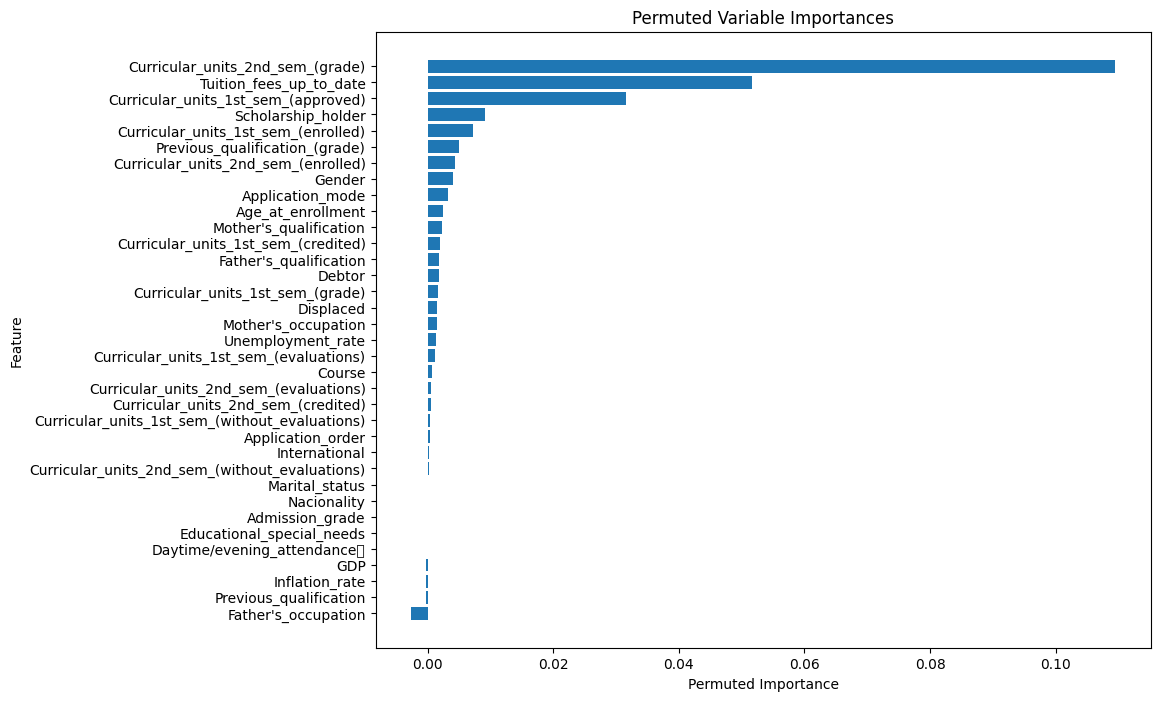

In [94]:
from sklearn.inspection import permutation_importance
# Compute permuted variable importances
result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')

# Create a DataFrame for permutation importances
perm_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

# Sort the DataFrame by importance
perm_importances = perm_importances.sort_values(by='Importance', ascending=False)

# Plot permuted variable importances
plt.figure(figsize=(10, 8))
plt.barh(perm_importances['Feature'], perm_importances['Importance'])
plt.xlabel('Permuted Importance')
plt.ylabel('Feature')
plt.title('Permuted Variable Importances')
plt.gca().invert_yaxis()
plt.show()

## SMOTE

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ["Target",'Curricular units 2nd sem (approved)']), df["Target"],test_size=.20, stratify =df["Target"],  random_state =123)

param_grid = {
    'smote__sampling_strategy': ['auto', 0.6],
    'smote__k_neighbors': [3, 5, 7],
    'lgbm__n_estimators': [100, 200, 300],
    'lgbm__max_depth': [1, 2, 4, 6],
    'lgbm__learning_rate': [0.01, 0.05],
    'lgbm__subsample': [0.6, 0.8],
    'lgbm__colsample_bytree': [0.6, 0.8]
}

# Create the pipeline with SMOTE and LightGBM
pipeline = ImbPipeline([
    ("preprocessor", preprocessor),
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("StdScaler" , StandardScaler()),
    ('smote', SMOTE()),
    ('lgbm', LGBMClassifier(verbose=-1))
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    refit=True
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         ['Course',
                                                                          "Father's "
                                                                          'occupation',
                                                                          'Gender',
                                                                          'Debtor',
                                                                          'Application '
                                                                          'mode',
                                                                          'Marital '
                                                                          'status',
                                                                          'Educational '
                                                                          'special '
                                                                          'needs',
                                                                          'Scholarship '
                                                                          'holder',
                                                                          'Nacionality',
                                                                          "Mother's "
                                                                          'occupatio...
                                       ('StdScaler', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('lgbm', LGBMClassifier(verbose=-1))]),
             n_jobs=-1,
             param_grid={'lgbm__colsample_bytree': [0.6, 0.8],
                         'lgbm__learning_rate': [0.01, 0.05],
                         'lgbm__max_depth': [1, 2, 4, 6],
                         'lgbm__n_estimators': [100, 200, 300],
                         'lgbm__subsample': [0.6, 0.8],
                         'smote__k_neighbors': [3, 5, 7],
                         'smote__sampling_strategy': ['auto', 0.6]},
             scoring='roc_auc', verbose=1)

In [97]:
grid_search.best_params_

{'lgbm__colsample_bytree': 0.6,
 'lgbm__learning_rate': 0.05,
 'lgbm__max_depth': 6,
 'lgbm__n_estimators': 100,
 'lgbm__subsample': 0.6,
 'smote__k_neighbors': 5,
 'smote__sampling_strategy': 0.6}

In [98]:
best_model = grid_search.best_estimator_

pred = best_model.predict(X_test)

# Print classification report and ROC AUC score
print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       601
           1       0.82      0.73      0.77       284

    accuracy                           0.86       885
   macro avg       0.85      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885

0.8252384523446837


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


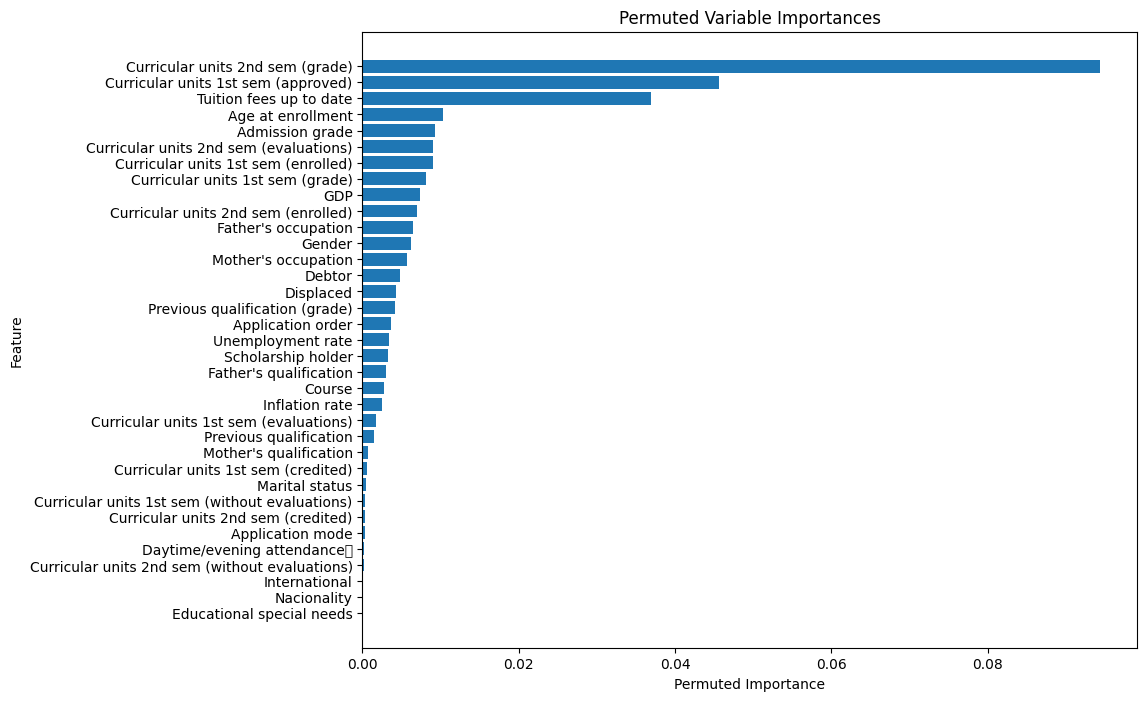

In [99]:
# Compute permuted variable importances
result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42, scoring='roc_auc')

# Create a DataFrame for permutation importances
perm_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

# Sort the DataFrame by importance
perm_importances = perm_importances.sort_values(by='Importance', ascending=False)

# Plot permuted variable importances
plt.figure(figsize=(10, 8))
plt.barh(perm_importances['Feature'], perm_importances['Importance'])
plt.xlabel('Permuted Importance')
plt.ylabel('Feature')
plt.title('Permuted Variable Importances')
plt.gca().invert_yaxis()
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


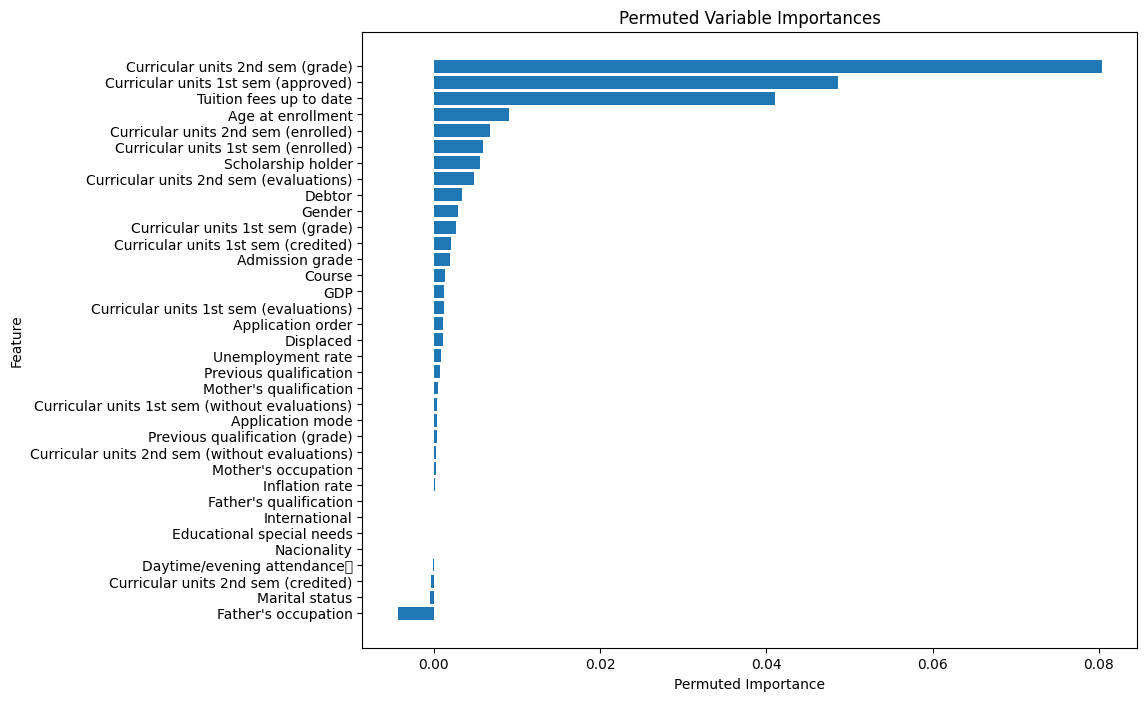

In [100]:
# Compute permuted variable importances
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')

# Create a DataFrame for permutation importances
perm_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

# Sort the DataFrame by importance
perm_importances = perm_importances.sort_values(by='Importance', ascending=False)

# Plot permuted variable importances
plt.figure(figsize=(10, 8))
plt.barh(perm_importances['Feature'], perm_importances['Importance'])
plt.xlabel('Permuted Importance')
plt.ylabel('Feature')
plt.title('Permuted Variable Importances')
plt.gca().invert_yaxis()
plt.show()

### Random forest
As with GBM, full untransformed only binned dataset will be used.

### Class weights

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ["Target",'Curricular units 2nd sem (approved)']), df["Target"],test_size=.20, stratify =df["Target"],  random_state =123)
param_grid = {
    'n_estimators': [100, 300],             # Number of trees in the forest
    'max_depth': [1, 3, 4],         # Maximum depth of the tree
    'min_samples_leaf': [5, 20],                   # Minimum number of samples required to be at a leaf node
    'max_features': [0.8, 0.6]
}

# Create the pipeline with GridSearchCV
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("grid_search", GridSearchCV(
        RandomForestClassifier(random_state=42, class_weight = 'balanced'),
        param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, refit=True
    ))
])

pipeline.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['Course',
                                                   "Father's occupation",
                                                   'Gender', 'Debtor',
                                                   'Application mode',
                                                   'Marital status',
                                                   'Educational special needs',
                                                   'Scholarship holder',
                                                   'Nacionality',
                                                   "Mother's occupation",
                                                   'Previous qualification',
                                                   'Tuition fees up t...
                                                   "Mother's qualification",
                                                   'Displaced'])])),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(class_weight='balanced',
                                                               random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [1, 3, 4],
                                          'max_features': [0.8, 0.6],
                                          'min_samples_leaf': [5, 20],
                                          'n_estimators': [100, 300]},
                              scoring='roc_auc', verbose=1))])

In [114]:
grid_search = pipeline.named_steps["grid_search"]
grid_search.best_params_

{'max_depth': 4,
 'max_features': 0.6,
 'min_samples_leaf': 5,
 'n_estimators': 300}

In [115]:
pred = pipeline.predict(X_test)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       601
           1       0.74      0.78      0.76       284

    accuracy                           0.84       885
   macro avg       0.82      0.83      0.82       885
weighted avg       0.85      0.84      0.84       885

0.8258565536312718


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


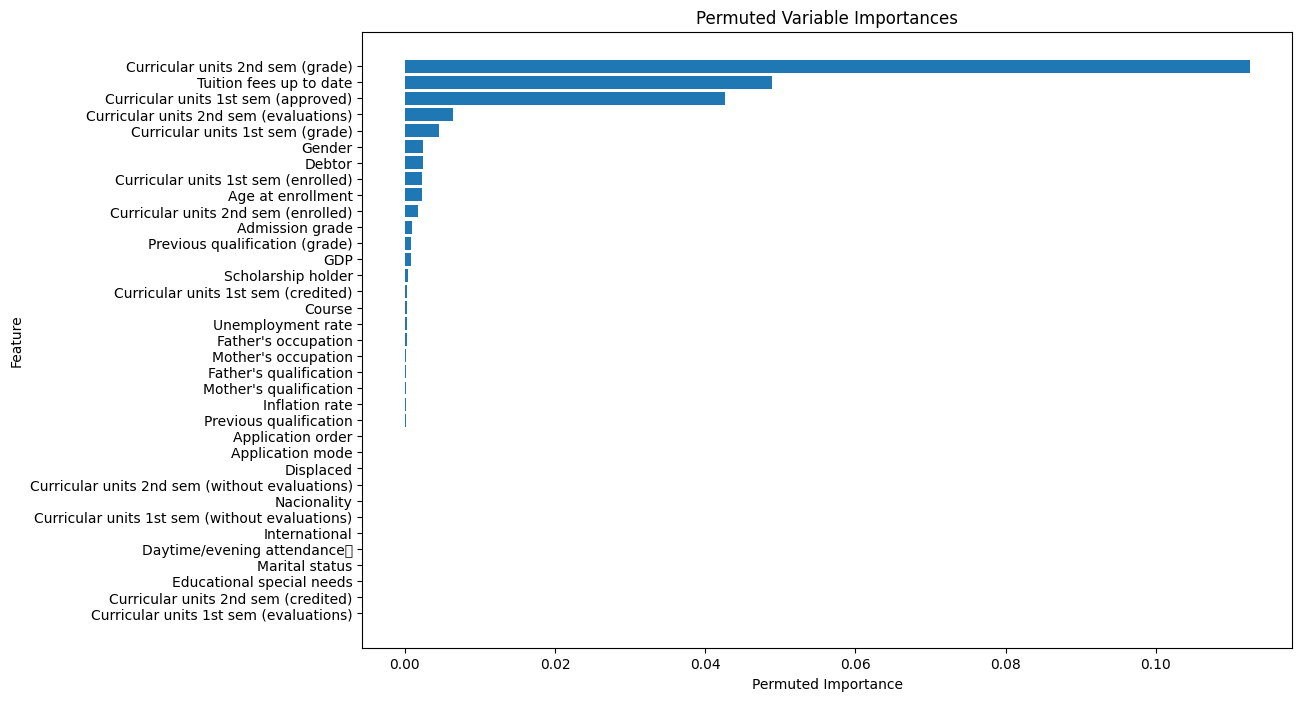

In [116]:
# Get the best model
best_model = pipeline

# Compute permuted variable importances
result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42, scoring='roc_auc')

# Create a DataFrame for permutation importances
perm_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

# Sort the DataFrame by importance
perm_importances = perm_importances.sort_values(by='Importance', ascending=False)

# Plot permuted variable importances
plt.figure(figsize=(12, 8))
plt.barh(perm_importances['Feature'], perm_importances['Importance'])
plt.xlabel('Permuted Importance')
plt.ylabel('Feature')
plt.title('Permuted Variable Importances')
plt.gca().invert_yaxis()
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


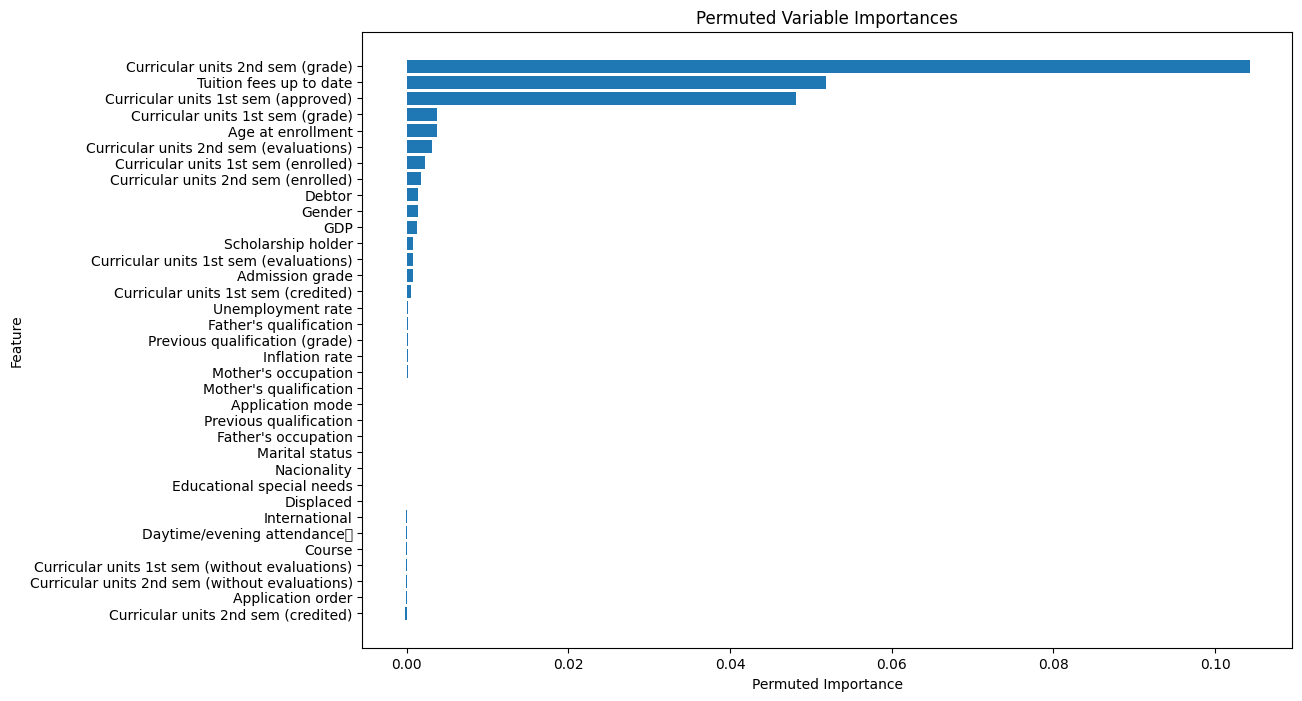

In [117]:
# Get the best model
best_model = pipeline

# Compute permuted variable importances
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')

# Create a DataFrame for permutation importances
perm_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

# Sort the DataFrame by importance
perm_importances = perm_importances.sort_values(by='Importance', ascending=False)

# Plot permuted variable importances
plt.figure(figsize=(12, 8))
plt.barh(perm_importances['Feature'], perm_importances['Importance'])
plt.xlabel('Permuted Importance')
plt.ylabel('Feature')
plt.title('Permuted Variable Importances')
plt.gca().invert_yaxis()
plt.show()

### SMOTE

In [118]:
# Replace spaces in column names

# Define the parameter grid for RandomForest and SMOTE
param_grid = {
    'smote__sampling_strategy': ['auto', 0.6],
    'smote__k_neighbors': [3, 5, 7],
    'rf__n_estimators': [100, 300],             # Number of trees in the forest
    'rf__max_depth': [1, 3, 4],         # Maximum depth of the tree
    'rf__min_samples_leaf': [5, 20],                   # Minimum number of samples required to be at a leaf node
    'rf__max_features': [0.8, 0.6]
}

# Create the pipeline with SMOTE, OneHotEncoder, and RandomForest
pipeline = ImbPipeline([
    ("preprocessor", preprocessor),
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ('smote', SMOTE()),
    ('rf', RandomForestClassifier(random_state=42))
])



# Perform grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    refit=True
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         ['Course',
                                                                          "Father's "
                                                                          'occupation',
                                                                          'Gender',
                                                                          'Debtor',
                                                                          'Application '
                                                                          'mode',
                                                                          'Marital '
                                                                          'status',
                                                                          'Educational '
                                                                          'special '
                                                                          'needs',
                                                                          'Scholarship '
                                                                          'holder',
                                                                          'Nacionality',
                                                                          "Mother's "
                                                                          'occupatio...
                                       ('imputer',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('smote', SMOTE()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [1, 3, 4],
                         'rf__max_features': [0.8, 0.6],
                         'rf__min_samples_leaf': [5, 20],
                         'rf__n_estimators': [100, 300],
                         'smote__k_neighbors': [3, 5, 7],
                         'smote__sampling_strategy': ['auto', 0.6]},
             scoring='roc_auc', verbose=1)

In [125]:
grid_search.best_params_

{'rf__max_depth': 4,
 'rf__max_features': 0.6,
 'rf__min_samples_leaf': 5,
 'rf__n_estimators': 300,
 'smote__k_neighbors': 7,
 'smote__sampling_strategy': 'auto'}

In [126]:
best_model = grid_search.best_estimator_
pred = best_model.predict(X_test)

print(classification_report(y_test, pred))
print(roc_auc_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       601
           1       0.80      0.76      0.78       284

    accuracy                           0.86       885
   macro avg       0.84      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885

0.8327640552131423


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


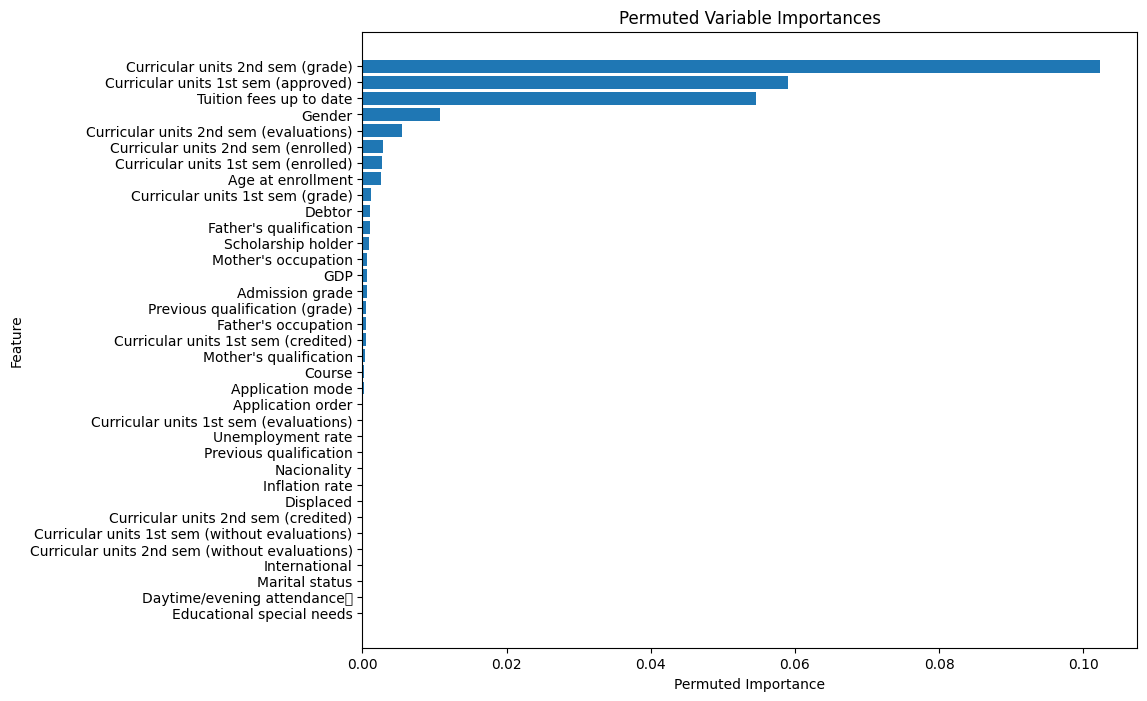

In [127]:
# Compute permuted variable importances
result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42, scoring='roc_auc')

# Create a DataFrame for permutation importances
perm_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

# Sort the DataFrame by importance
perm_importances = perm_importances.sort_values(by='Importance', ascending=False)

# Plot permuted variable importances
plt.figure(figsize=(10, 8))
plt.barh(perm_importances['Feature'], perm_importances['Importance'])
plt.xlabel('Permuted Importance')
plt.ylabel('Feature')
plt.title('Permuted Variable Importances')
plt.gca().invert_yaxis()
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


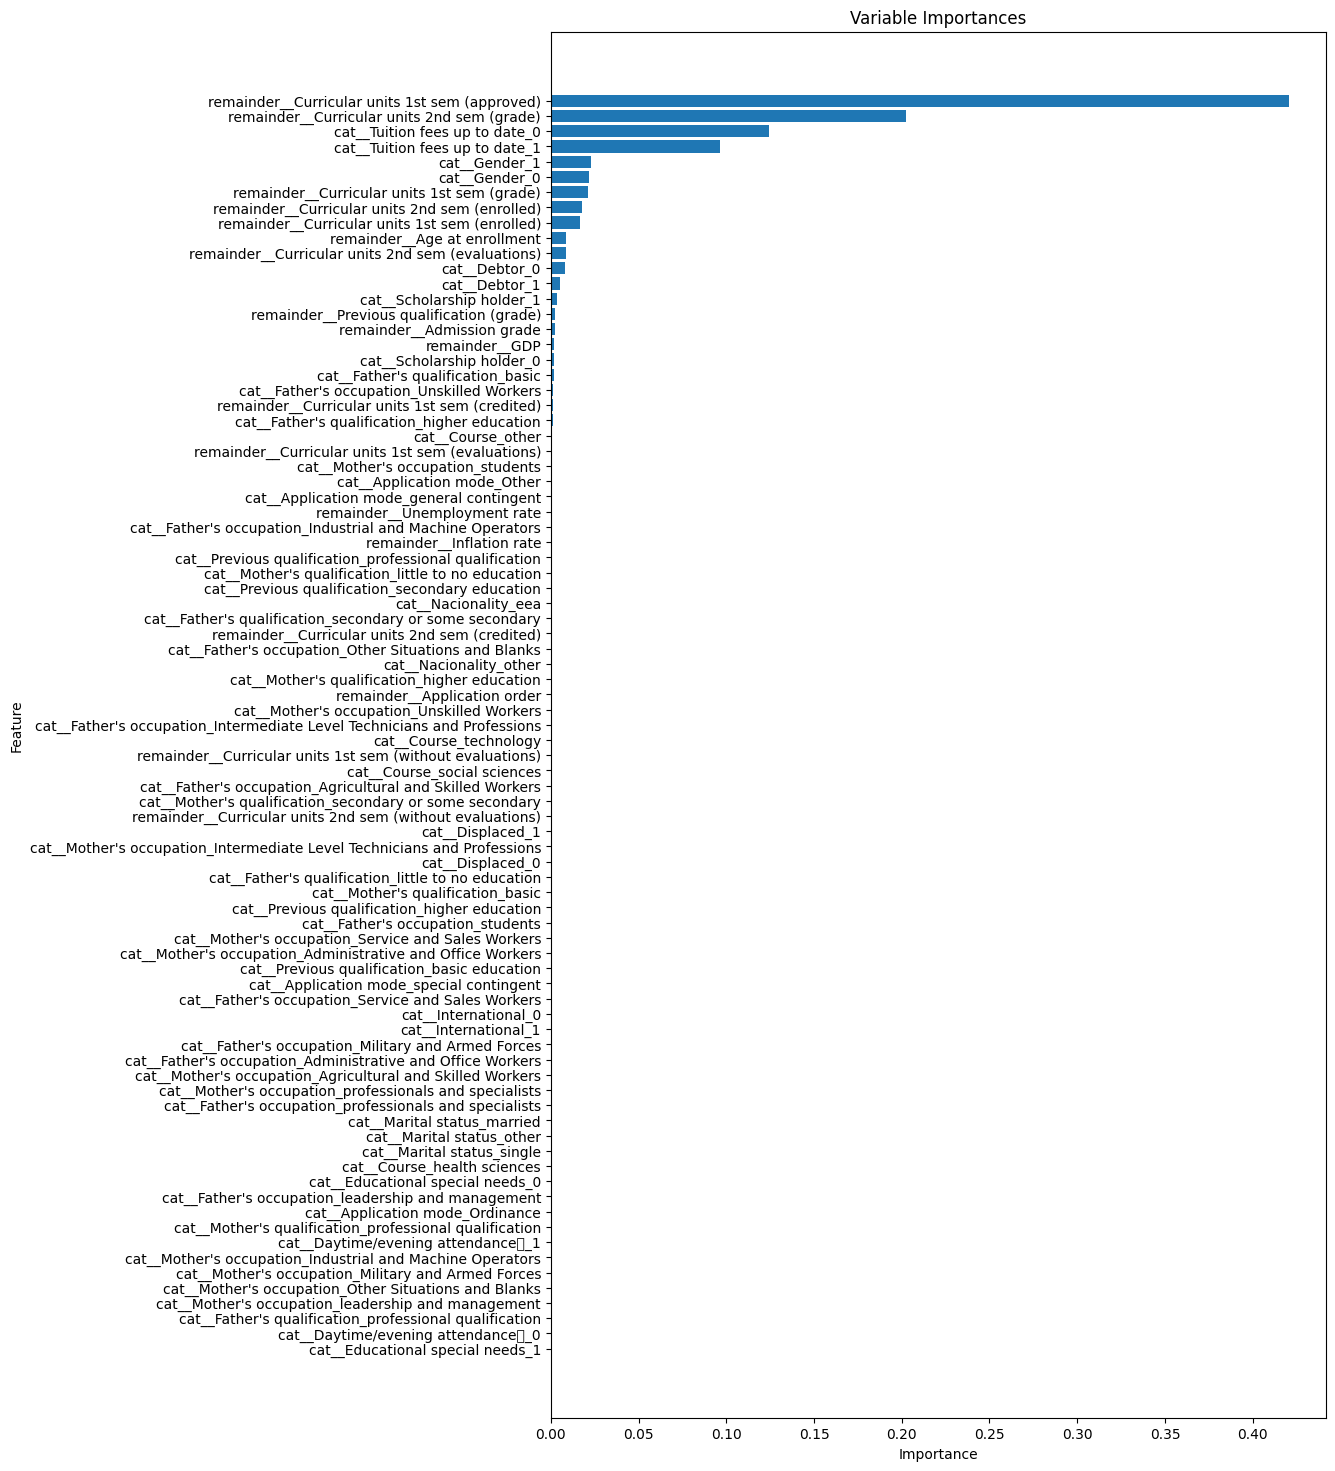

In [148]:
#result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42, scoring='roc_auc')

# Get feature names from preprocessor
preprocessor_1 = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_column)
    ],
    remainder="passthrough"  # This will pass through any remaining columns without transformation
)
preprocessor_1.fit_transform(X_test)
feature_names = preprocessor_1.get_feature_names_out()








# Create a DataFrame for permutation importances
perm_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_model.named_steps['rf'].feature_importances_
})

# Sort the DataFrame by importance
perm_importances = perm_importances.sort_values(by='Importance', ascending=False)

# Plot permuted variable importances
plt.figure(figsize=(10, 18))
plt.barh(perm_importances['Feature'], perm_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Variable Importances')
plt.gca().invert_yaxis()
plt.show()

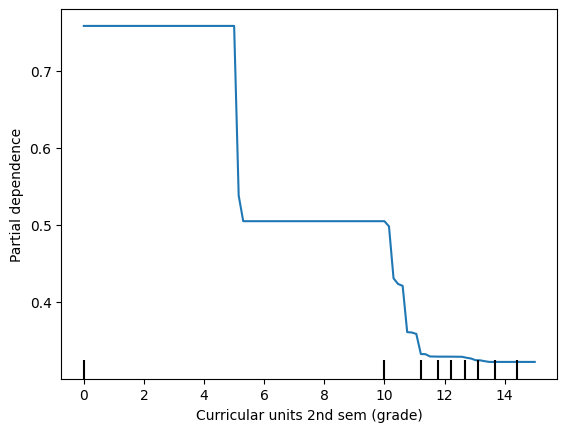

In [152]:
from sklearn.inspection import PartialDependenceDisplay

# Get the best model from grid search
#best_model = grid_search.best_estimator_

# Plot partial dependence for selected features
features = ['Gender']  # Replace 'feature_name_1' and 'feature_name_2' with the names of the features you want to plot

PartialDependenceDisplay.from_estimator(best_model,X_train,['Curricular units 2nd sem (grade)'])



# Calculate partial depende